<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]



In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  sample_means = np.array([])
  for i in range(n_iterations):
    sample_data = np.random.choice(sample,sample_size)
    sample_mean= np.mean(sample_data)
    sample_means=np.append(sample_means,[sample_mean])
  
  data_mean = np.mean(sample_means)
  sample_means = np.sort(sample_means)
  lower = sample_means[0]
  upper = sample_means[n_iterations-1]
  
  return data_mean, lower, upper


(0, 40000)

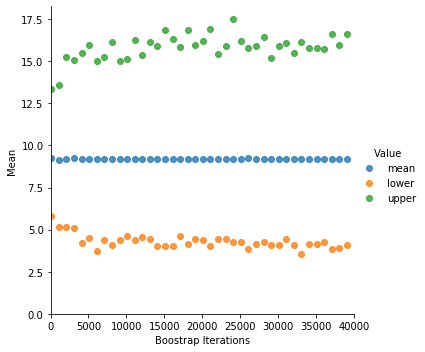

In [54]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 40000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])


df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 40000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
  sample_means = np.array([])
  for i in range(iterations):
    sample_data = np.random.choice(sample,sample_size)
    sample_mean= np.mean(sample_data)
    sample_means=np.append(sample_means,[sample_mean])

  sample_means = np.sort(sample_means)
  cl=int(((1-ci/100)*iterations)/2)
  sample_means=sample_means[cl:-cl]
  data_mean = np.mean(sample_means)
  lower = sample_means[0]
  upper = sample_means[sample_means.size-1]
  return data_mean, lower, upper

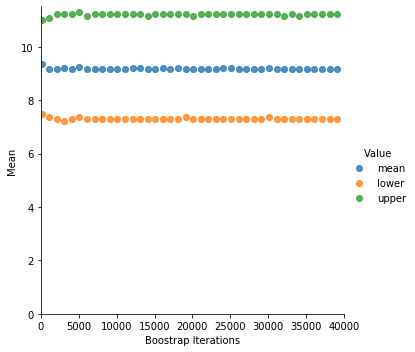

In [64]:
boots = []
for i in range(100, 40000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 40000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

##Vehicle Data Set

In [62]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicle.csv')
data = df.values.T[1]
print(data)

ParserError: ignored

Current Fleet

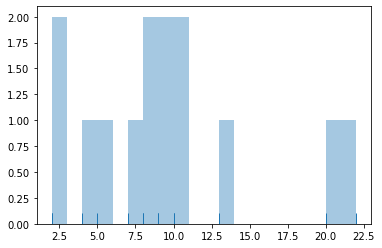

In [60]:
sns.distplot(data,bins=20,kde=False, rug=True)
df_data = pd.DataFrame(data, columns=['Vehicle', 'Mean', "Value"])